## British Airways Reviews Data - Data Cleaning

In [1]:
import numpy as np
import pandas as pd

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
ba_reviews = pd.read_csv('/Users/vatsalmandalia/Downloads/BA_reviews.csv')
ba_reviews.head(10)

,Unnamed: 0,reviews
0,0,✅ Trip Verified | My family and I have flown ...
1,1,✅ Trip Verified | This has been by far the wo...
2,2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,3,Not Verified | BA is not treating its premium ...
4,4,✅ Trip Verified | 24 hours before our departu...
5,5,✅ Trip Verified | We arrived at Heathrow at 0...
6,6,✅ Trip Verified | Original flight was cancell...
7,7,Not Verified | Airport check in was functiona...
8,8,✅ Trip Verified | Flight fine. In-line with c...
9,9,✅ Trip Verified | Came from Glasgow to London...


In [3]:
ba_reviews.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
ba_reviews

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
...,...
995,Not Verified | Glasgow to Miami via London. G...
996,✅ Trip Verified | London Heathrow to Budapest...
997,✅ Trip Verified | Budapest to London Heathrow...
998,✅ Trip Verified | London to Toronto. Group of...


## Text cleaning

### Removing this phrase from all reviews - ✅ Trip Verified | 

In [5]:
reviews_new = []
for sent in ba_reviews['reviews']:
    mod_sent = sent.replace('✅ Trip Verified | ','')
    reviews_new.append(mod_sent)

In [6]:
reviews_new[0]

' My family and I have flown mostly on British Airways for the last 30 years. I am a priority passenger and fly often enough to recognise cabin crew and know some by name. They used to be a really good airline to fly with. Things have really deteriorated with their face to face customer care since the pandemic. The aircraft look worn. For example, on my flight back my audiovisual equipment did not work and had to be reset twice, finally working in the last hour before we landed. The second time around, I think the reset was done for the whole aircraft. The touch screen function on my screen did not work. The USB charger ports on my seat did not work. The staff were pleasant enough, but their service oozed mediocrity.  There did not seem to be much pride in what they were doing. The food has been the worst part on our BA flights since the pandemic. They gave us a menu, asked what we’d like, did a check and then told us that it was not available as they had run out and would we like to c

### Normalizing the text - converting to lowercase

In [7]:
lower_reviews = []

In [8]:
for sent in reviews_new:
    lower_sent = sent.lower()
    lower_reviews.append(lower_sent)

In [9]:
lower_reviews[0]

' my family and i have flown mostly on british airways for the last 30 years. i am a priority passenger and fly often enough to recognise cabin crew and know some by name. they used to be a really good airline to fly with. things have really deteriorated with their face to face customer care since the pandemic. the aircraft look worn. for example, on my flight back my audiovisual equipment did not work and had to be reset twice, finally working in the last hour before we landed. the second time around, i think the reset was done for the whole aircraft. the touch screen function on my screen did not work. the usb charger ports on my seat did not work. the staff were pleasant enough, but their service oozed mediocrity.  there did not seem to be much pride in what they were doing. the food has been the worst part on our ba flights since the pandemic. they gave us a menu, asked what we’d like, did a check and then told us that it was not available as they had run out and would we like to c

### Removing stopwords

In [10]:
import nltk
nltk.download('corpus')
import warnings
warnings.filterwarnings("ignore")

/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/vatsalmandalia/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more det

In [11]:
from nltk.corpus import stopwords

In [12]:
stop = stopwords.words("english")

In [13]:
no_stop_reviews = []
for sent in lower_reviews:
    no_stop_sent = " ".join([word for word in sent.split() if word not in stop])
    no_stop_reviews.append(no_stop_sent)

### Words with apostrophe's (eg: 'd, 's, 'll etc.)
In order to replace words with apostrophes to standard lexicons, we use a dictionary.

In [14]:
apostrophes_dict = {"’s":" is","n’t":" not","’m":" am","’ll":" will",
           "’d":" would","’ve":" have","’re":" are"}
no_apos_reviews = []

# replace the contraction/words with apostrophes
for sent in no_stop_reviews:
    for key,value in apostrophes_dict.items():
        if key in sent:
            sent = sent.replace(key,value)
    no_apos_reviews.append(sent)

In [15]:
no_apos_reviews[0]

'family flown mostly british airways last 30 years. priority passenger fly often enough recognise cabin crew know name. used really good airline fly with. things really deteriorated face face customer care since pandemic. aircraft look worn. example, flight back audiovisual equipment work reset twice, finally working last hour landed. second time around, think reset done whole aircraft. touch screen function screen work. usb charger ports seat work. staff pleasant enough, service oozed mediocrity. seem much pride doing. food worst part ba flights since pandemic. gave us menu, asked we would like, check told us available run would like choose something else. told us we would get first choice second service could not deliver on. finally choosing getting whatever did, food tasteless. take part post flight surveys regularly stated this, avail. family 3, fly british airways medium long haul regularly, possibly 4-6 times year each. us, good things flying ba priority customers, usually direct

### Removing punctuations using Regex

In [16]:
import string
import re

no_punct_reviews = []

# replacing punctuation with empty string
# Regex
# \w is equivalent to [a-zA-Z0-9_]
# \s matches any whitespace characters
for sent in no_apos_reviews:
    sent_new = re.sub(r'[^\w\s]', '', sent)
    no_punct_reviews.append(sent_new)    

In [17]:
no_punct_reviews[10]

'flight 12 may 2023 got delayed hour 25 minutes resulted cancellation connection flight 12 may 2023 arrival first flight 15 departure second connecting flight contacted ba call center multiple times make changes flight order still arrive 12th may kef airport different flights team tried find solution none made sense even next day 13th may 2023 made full booking accommodation car rental activities etc vacation iceland cancellation booking refundable call center suggested cancel flight full refund claim compensation delay difference airfare cost non refundable bookings due delay cancellation flight british airways responded claim month compensation all even though paid additional 600 new bookings additional charges refund cancelled flight took month multiple calla follow almost every week promised get refund first call later found processed properly everytime call agent ask questions flight canceled etc annoying understanding everything process payment multiple calls refunded partially f

### Tokenization

In [18]:
from nltk.tokenize import word_tokenize

In [19]:
reviews_tokens = []
for rev in no_punct_reviews:
    tokens = word_tokenize(rev)
    reviews_tokens.append(tokens)
print(type(reviews_tokens))

<class 'list'>


In [20]:
all_tokens = [item for sub_list in reviews_tokens for item in sub_list]
print(len(all_tokens))

78007


In [21]:
# frequency of token
from nltk.probability import FreqDist
fdist = FreqDist()

In [22]:
for word in all_tokens:
    fdist[word]+=1

In [23]:
keys_tk = fdist.keys()
keys_df = pd.DataFrame(keys_tk)
values_tk = fdist.values()
values_df = pd.DataFrame(values_tk)

In [24]:
token_freq = pd.concat([keys_df, values_df], axis = 1)
token_freq.columns = ['Tokens', 'Frequency']
token_freq.sort_values('Frequency', ascending = False).reset_index(drop=True)

,Tokens,Frequency
0,flight,1811
1,ba,1082
2,service,710
3,london,599
4,seat,512
...,...,...
7934,adaptive,1
7935,aftertaste,1
7936,wellpresented,1
7937,simpler,1


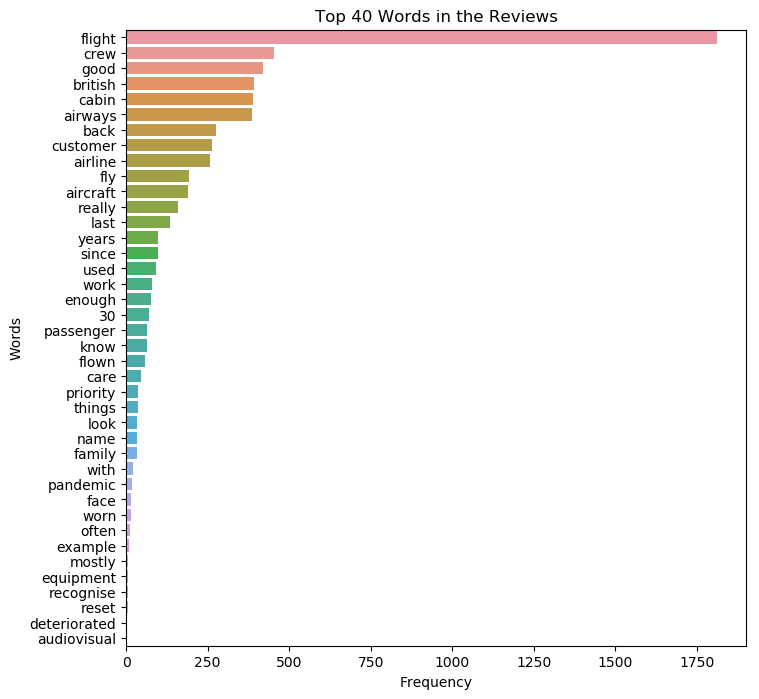

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (8,8))
sns.barplot(x = 'Frequency', y = 'Tokens', 
            data = token_freq.iloc[0:40,].sort_values('Frequency', ascending = False))
plt.title('Top 40 Words in the Reviews')
plt.ylabel('Words')
plt.show()

### Top 10 most common tokens

In [26]:
fdist_top10 = fdist.most_common(10)
fdist_top10

[('flight', 1811),
 ('ba', 1082),
 ('service', 710),
 ('london', 599),
 ('seat', 512),
 ('time', 476),
 ('food', 466),
 ('crew', 453),
 ('good', 419),
 ('one', 419)]

### N-grams - bigrams and trigrams

In [27]:
from nltk.util import bigrams, trigrams, ngrams

In [28]:
reviews_bigrams = list(nltk.bigrams(all_tokens))
# reviews_bigrams

### Wordcloud generation

In [29]:
# combine all reviews in a single paragraph
reviews_string = " ".join(all_tokens)

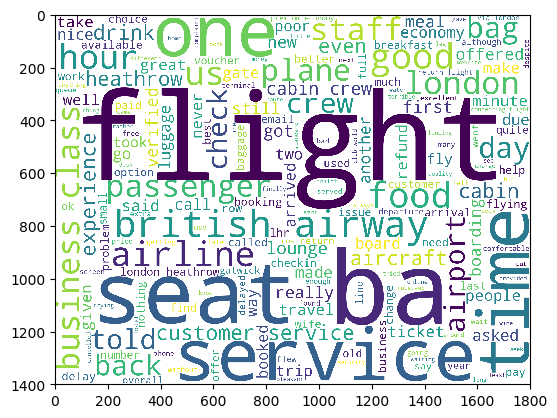

In [30]:
# Wordcloud
from wordcloud import WordCloud

wordcloud_rev = WordCloud(background_color = 'white',
                         width = 1800,
                         height = 1400, min_font_size = 6).generate(reviews_string)
plt.imshow(wordcloud_rev)
plt.show()

### Sentiment Analysis

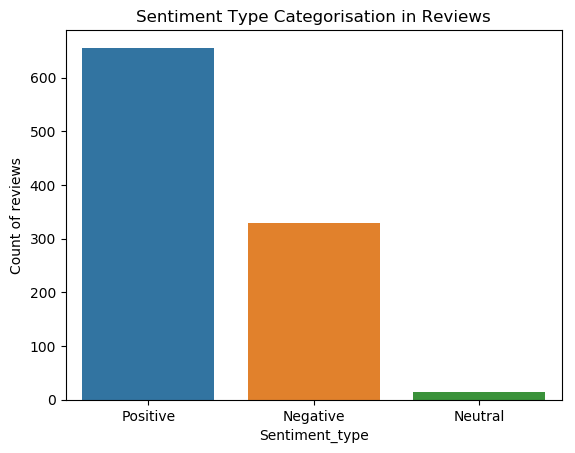

In [31]:
from textblob import TextBlob

bloblist_desc = []
for row in no_punct_reviews:
    blob = TextBlob(row)
    bloblist_desc.append((row, blob.sentiment.polarity, blob.sentiment.subjectivity))
    reviews_polarity_df = pd.DataFrame(bloblist_desc, columns = ['Review', 'Sentiment', 'Polarity'])
    
def func(reviews_polarity_df):
    if(reviews_polarity_df['Sentiment'] > 0):
        val = 'Positive'
    elif(reviews_polarity_df['Sentiment'] == 0):
        val = 'Neutral'
    else:
        val = 'Negative'
    return val
reviews_polarity_df['Sentiment_type'] = reviews_polarity_df.apply(func, axis = 1)

# Sentiment type categorisation amongst reviews
sns.countplot(x='Sentiment_type', data=reviews_polarity_df)
plt.title('Sentiment Type Categorisation in Reviews')
plt.ylabel('Count of reviews')
plt.show()

In [44]:
reviews_polarity_df

,Review,Sentiment,Polarity,Sentiment_type
0,family flown mostly british airways last 30 ye...,0.157778,0.470342,Positive
1,far worst service plane obvious flying economy...,-0.063542,0.543750,Negative
2,nov 2022 booked paid return journey new zealan...,0.129545,0.431818,Positive
3,verified ba treating premium economy passenge...,0.000000,0.000000,Neutral
4,24 hours departure ba059 cape town heathrow th...,-0.048167,0.440500,Negative
...,...,...,...,...
995,verified glasgow miami via london glasgow hea...,0.167222,0.508333,Positive
996,london heathrow budapest much disappointing ex...,0.166667,0.466667,Positive
997,budapest london heathrow flight departed time ...,0.037500,0.543056,Positive
998,london toronto group 10 people age 2 60 busine...,0.350000,0.726190,Positive


### Comparison between positive and negative wordclouds

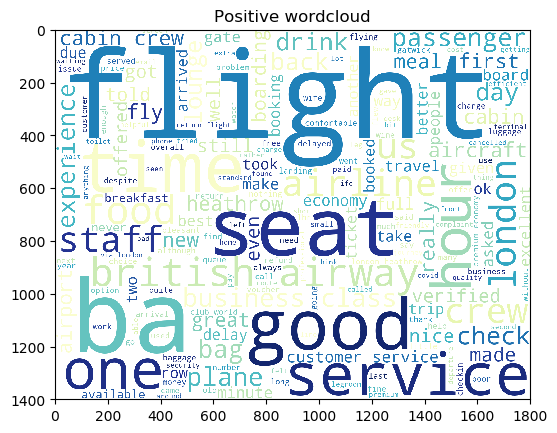

In [34]:
# Positive wordcloud
positive_reviews_df = reviews_polarity_df[reviews_polarity_df.Sentiment_type=='Positive']

positive_rev_str = []
for row in positive_reviews_df.Review:
    positive_rev_str.append(row)
    
positive_rev_str = ' '.join(positive_rev_str)

pos_wordcloud_rev = WordCloud(background_color = 'white',
                              colormap = 'YlGnBu_r',
                              width = 1800,
                              height = 1400, min_font_size = 6).generate(positive_rev_str)
plt.imshow(pos_wordcloud_rev)
plt.title('Positive wordcloud')
plt.show()

#### Top 40 words in positive reviews

In [35]:
# Top 40 words
fdist_new = FreqDist()

pos_revs_list = []
for rev in positive_reviews_df.Review:
    pos_revs_list.append(rev)
    
pos_reviews_tokens = []
for rev in pos_revs_list:
    tokens = word_tokenize(rev)
    pos_reviews_tokens.append(tokens)

pos_tokens = [item for sub_list in pos_reviews_tokens for item in sub_list]
print(len(pos_tokens))

53594


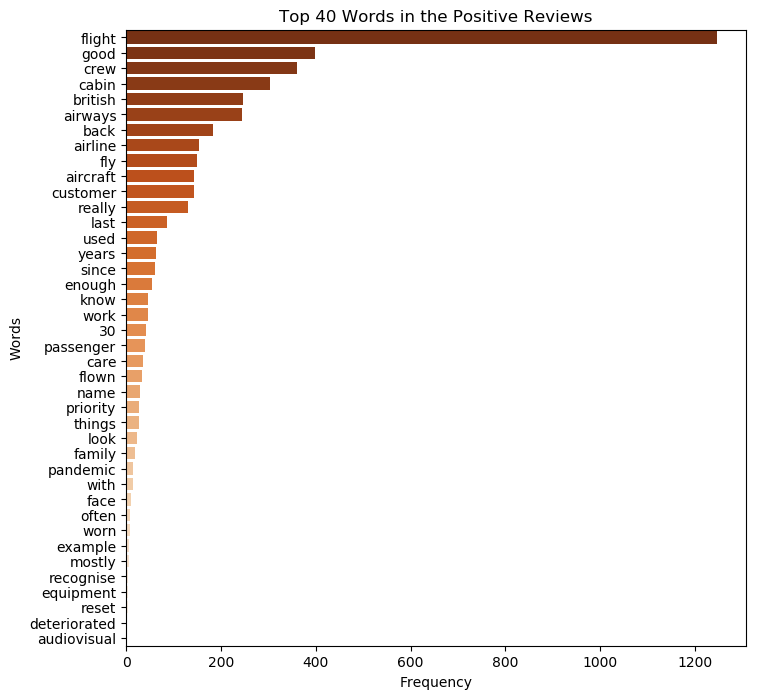

In [36]:
# Top 40 words in positive reviews
for word in pos_tokens:
    fdist_new[word]+=1

keys_pos = fdist_new.keys()
keys_pos = pd.DataFrame(keys_pos)
values_pos = fdist_new.values()
values_pos = pd.DataFrame(values_pos)

pos_token_freq = pd.concat([keys_pos, values_pos], axis = 1)
pos_token_freq.columns = ['Tokens', 'Frequency']
pos_token_freq.sort_values('Frequency', ascending = False).reset_index(drop=True)

plt.figure(figsize = (8,8))
sns.barplot(x = 'Frequency', y = 'Tokens', 
            data = pos_token_freq.iloc[0:40,].sort_values('Frequency', ascending = False), palette = 'Oranges_r')
plt.title('Top 40 Words in the Positive Reviews')
plt.ylabel('Words')
plt.show()

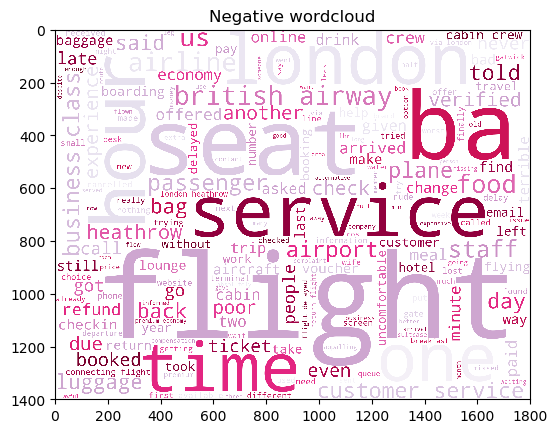

In [38]:
# Negative wordcloud
negative_reviews_df = reviews_polarity_df[reviews_polarity_df.Sentiment_type=='Negative']

negative_rev_str = []
for row in negative_reviews_df.Review:
    negative_rev_str.append(row)
    
negative_rev_str = ' '.join(negative_rev_str)

neg_wordcloud_rev = WordCloud(background_color = 'white',
                              colormap = 'PuRd',
                              width = 1800,
                              height = 1400, min_font_size = 8).generate(negative_rev_str)
plt.imshow(neg_wordcloud_rev)
plt.title('Negative wordcloud')
plt.show()

#### Top 40 words in negative reviews

In [42]:
# top 40 words
fdist_new = FreqDist()

neg_revs_list = []
for rev in negative_reviews_df.Review:
    neg_revs_list.append(rev)
    
neg_reviews_tokens = []
for rev in neg_revs_list:
    tokens = word_tokenize(rev)
    neg_reviews_tokens.append(tokens)

neg_tokens = [item for sub_list in neg_reviews_tokens for item in sub_list]
print(len(neg_tokens))

23801


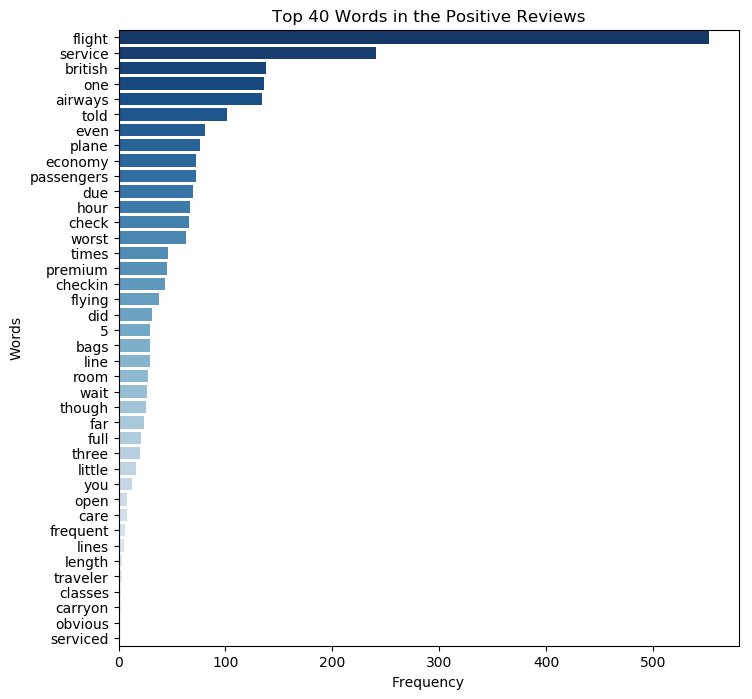

In [43]:
# top 40 words in negative reviews
for word in neg_tokens:
    fdist_new[word]+=1

keys_neg = fdist_new.keys()
keys_neg = pd.DataFrame(keys_neg)
values_neg = fdist_new.values()
values_neg = pd.DataFrame(values_neg)

neg_token_freq = pd.concat([keys_neg, values_neg], axis = 1)
neg_token_freq.columns = ['Tokens', 'Frequency']
neg_token_freq.sort_values('Frequency', ascending = False).reset_index(drop=True)

plt.figure(figsize = (8,8))
sns.barplot(x = 'Frequency', y = 'Tokens', 
            data = neg_token_freq.iloc[0:40,].sort_values('Frequency', ascending = False), palette = 'Blues_r')
plt.title('Top 40 Words in the Positive Reviews')
plt.ylabel('Words')
plt.show()